In [32]:
# !pip install statsmodels==0.12.2

## need 0.12.2 version, apparently we already have 0.12.2

In [33]:
import statsmodels
print(statsmodels.__version__)

0.12.2


# Introduction to Time Series Forecasting

This notebook presents an introduction to time series forecasting. Specifically, we focus on some basic concepts used for forecasting *univariate* time series. Note that many of the concepts here also apply to the *multivariate* time series case.

## Time Series

Formally, a **time series** is a collection of random variables indexed by time,

$$\{y_t\}_{t=1,2,3,\ldots}$$

If $y_t$ is a scalar, the time series is *univariate*. Otherwise, if $y_t$ is a vector it is *multivariate*.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Bike_Sharing.xlsx')
df.index = pd.to_datetime(df['dteday']) # convert to datetime obj
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
dteday,,,,,,,,,,,,,,
2011-01-01,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
2012-12-28,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
2012-12-29,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341


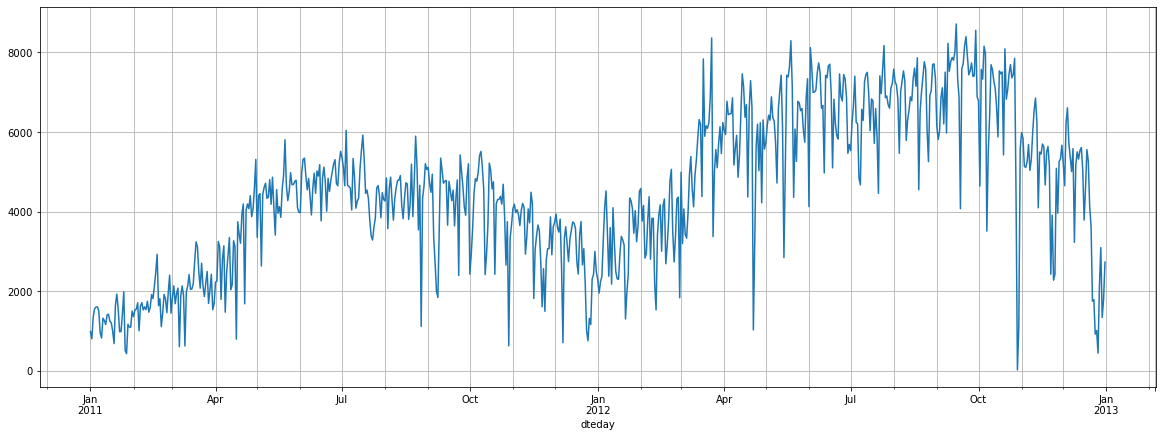

In [35]:
plt.rcParams["figure.figsize"] = (20,7)
ts = df['count']
ts.plot()
plt.grid('on', which='major')
plt.grid('on', which='minor')
plt.autoscale()
plt.show()

## One-Step vs Multi-Step Forecasting

Before we begin forecasting, we should make sure that our objectives are well defined.

Is our goal to perform *one-step* or *multi-step* forecasting?

1. One-step forecasting refers to making a prediction for the next time step.

2. Multi-step forecasting refers to making predictions for the next $h$ time steps. We will refer to $h$ as the prediction/forecast horizon.

## Baseline Methods for Forecasting

We will look at one very basic method for forecasting, the Naïve method.

In the notation below, $T$ refers to the length of the time series (usually the <u>training set</u>) and $h$ refers to the horizon.

### Naïve Method

In the **naïve method**, forecasts of *all* future values are equal to the last observation.

$$\hat{y}_{T+h} = y_T$$

for all $h = 1, 2, 3, \ldots$.

#### Example 1 - One-Step Forecast.

For one-step forecast, Naive method is the baseline to beat.

Suppose we wanted to generate a one-step prediction for 12-31-2012 (the last observation in our dataset).

Then our forecast is just the previous day's observation, 12-30-2012.

In [36]:
ts

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: count, Length: 731, dtype: int64

In [37]:
y_hat = ts[-2]
df_f = pd.DataFrame()
df_f['Actual'] = ts[-1:]
df_f['Forecast'] = y_hat
df_f

,Actual,Forecast
dteday,,
2012-12-31,2729,1796


#### Example 2 - Multi-Step Forecast.

use when you want to forecast long term (strategic planning). Next week, next year etc.

Suppose we wanted to generate a multi-step forecast for the last week of December 2012 (from 12-25-2012 to 12-31-2012).

Then we use the observation on 12-24-2012 as our forecasts.

In [38]:
y_hat = np.repeat(ts['12-24-2012'], 7)
y_hat

df_f = pd.DataFrame()
df_f['Actual'] = ts[-7:]
df_f['Forecast'] = y_hat
df_f

,Actual,Forecast
dteday,,
2012-12-25,1013,920
2012-12-26,441,920
2012-12-27,2114,920
2012-12-28,3095,920
2012-12-29,1341,920
2012-12-30,1796,920
2012-12-31,2729,920


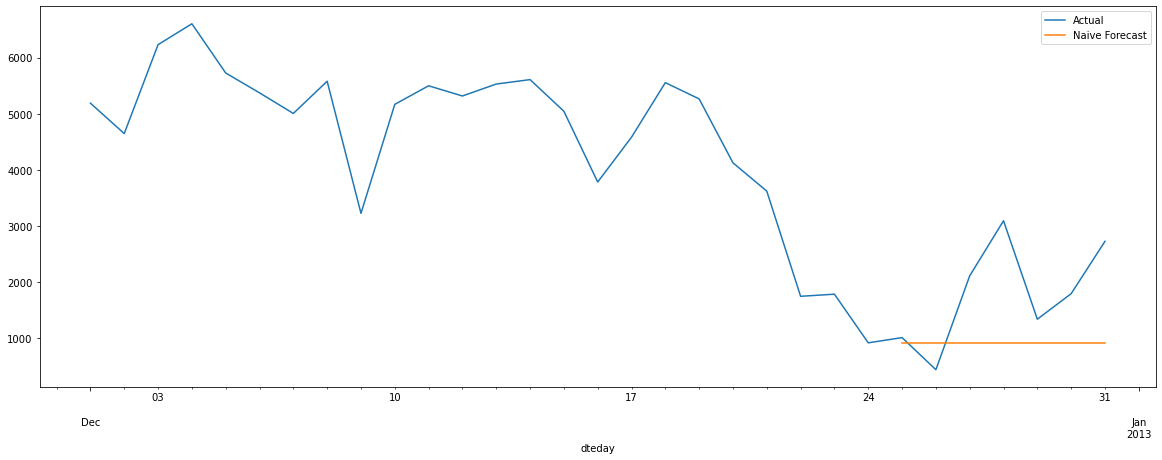

In [39]:
ax = ts[-31:].plot()
df_f['Forecast'].plot(ax=ax)
plt.autoscale()
plt.legend(['Actual', 'Naive Forecast'])
plt.show()

In [40]:
np.arange(1,20)[-5:]

array([15, 16, 17, 18, 19])

#### Example 3 - Multiple One-Step Forecasts.

In what situation where you would need do this? **Any sort of daily tracking.** (stock market)

Suppose we wanted to generate multiple one-step forecasts that cover the last week of December 2012 (from 12-25-2012 to 12-31-2012).

Then for each date in the prediction horizon, we use the previous day's observation as the forecast.

In [41]:
y_hat = ts[-8:-1].to_numpy()
y_hat

df_f = pd.DataFrame()
df_f['Actual'] = ts[-7:]
df_f['Forecast'] = y_hat
df_f

## shifted the actual to the right then thats the forecast

,Actual,Forecast
dteday,,
2012-12-25,1013,920
2012-12-26,441,1013
2012-12-27,2114,441
2012-12-28,3095,2114
2012-12-29,1341,3095
2012-12-30,1796,1341
2012-12-31,2729,1796


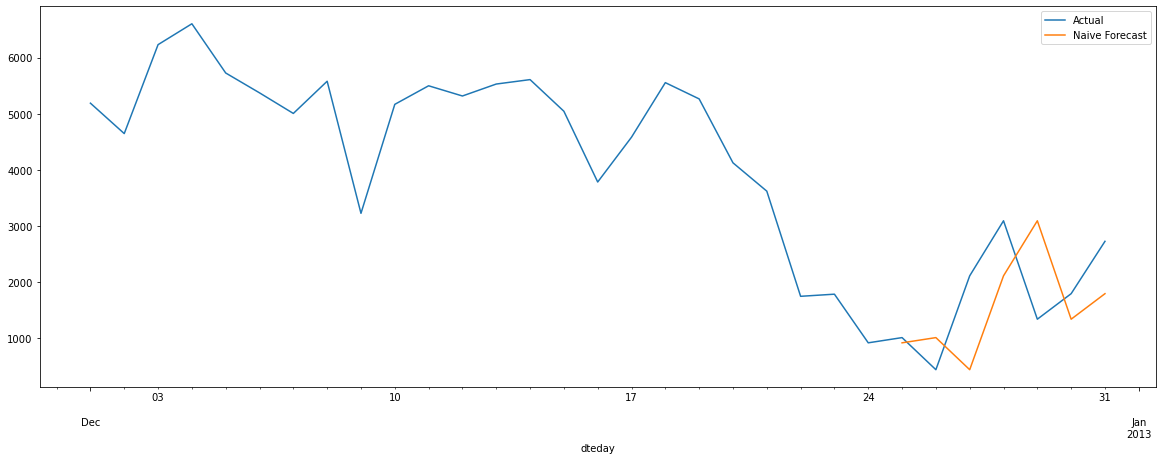

In [42]:
ax = ts[-31:].plot()
df_f['Forecast'].plot(ax=ax)
plt.autoscale()
plt.legend(['Actual', 'Naive Forecast'])
plt.show()

## Train-Test Partitions and Cross-Validation for Time Series Data
Creating train-test partitions for time series data is not necessarily as straightforward as in previous topics. Depending on how the problem is defined, the construction of train-test partitions can be quite different.

Let's illustrate this using an example.

#### Example 4 - Multiple Multi-Step Forecasts 1.
In order to plan out the operations of each week effectively, the bike operations team conducts a planning meeting at the end of each week. At this meeting, your job is to present a 7-day forecast for the following week.

Suppose that it is currently the last day of 2012 (12-31-2012). You would like to test how well a naïve method would have worked for that month. 

*Note: This is sometimes refered to as backtesting.*

For this problem, we're going to chunk the December observations into four 7-day chunks from Monday to Sunday:

1. 12-03-2012 to 12-09-2012
2. 12-10-2012 to 12-16-2012
3. 12-17-2012 to 12-23-2012
4. 12-24-2012 to 12-30-2012


In [ ]:


# First week
y_hat = np.repeat(ts['12-02-2012'], 7)
y_hat

df_f1 = pd.DataFrame()
df_f1['Actual'] = ts['2012-12-03':'2012-12-09']
df_f1['Forecast'] = y_hat
df_f1


In [ ]:


# second week
y_hat = np.repeat(ts['12-09-2012'], 7)
y_hat

df_f2 = pd.DataFrame()
df_f2['Actual'] = ts['2012-12-10':'2012-12-16']
df_f2['Forecast'] = y_hat
df_f2


In [ ]:


# third week
y_hat = np.repeat(ts['12-16-2012'], 7)
y_hat

df_f3 = pd.DataFrame()
df_f3['Actual'] = ts['2012-12-17':'2012-12-23']
df_f3['Forecast'] = y_hat
df_f3


In [ ]:


# fourth week
y_hat = np.repeat(ts['12-23-2012'], 7)
y_hat

df_f4 = pd.DataFrame()
df_f4['Actual'] = ts['2012-12-24':'2012-12-30']
df_f4['Forecast'] = y_hat
df_f4


Notice that because of how the problem was set up, we actually have four test sets.

To evaluate how well the naïve method performed, we can calculate an error statistic on each of the test sets and take its average. For this problem let's use the *mean absolute error* (MAE),

$$\text{MAE} = \frac{1}{n}\sum_i^n |y_i - \hat{y}_i|$$

MAE is +- `MAE` units away from the actual value

In [47]:
## calculating MAE for all 4 weeks

from sklearn.metrics import mean_absolute_error

MAE = [mean_absolute_error(df_f1['Actual'], df_f1['Forecast']), 
       mean_absolute_error(df_f2['Actual'], df_f2['Forecast']), 
       mean_absolute_error(df_f3['Actual'], df_f3['Forecast']), 
       mean_absolute_error(df_f4['Actual'], df_f4['Forecast'])]
MAE

[1151.5714285714287, 1910.0, 1227.4285714285713, 725.2857142857143]

In [48]:
avg_mae = np.mean(MAE)
avg_mae

1253.5714285714287

This style of cross-validation is implemented by `sklearn.model_selection.TimeSeriesSplit` and is a variant of k-fold.

#### Example 5 - Multiple Multi-Step Forecasts 2.

Suppose that instead of weekly meetings, the meetings are held every <u>end-of-day</u>. Thus, your job is to present a 7-day forecast for the next 7 days, *every* day.

If we want to backtest on all December observations (12-01-2012 to 12-31-2012), how many test sets will we have?

In [54]:
for d in pd.date_range(start='2012-12-01', end='2012-12-25'):
    print(ts[d:d+pd.DateOffset(6)])
    print('----')

dteday
2012-12-01    5191
2012-12-02    4649
2012-12-03    6234
2012-12-04    6606
2012-12-05    5729
2012-12-06    5375
2012-12-07    5008
Name: count, dtype: int64
----
dteday
2012-12-02    4649
2012-12-03    6234
2012-12-04    6606
2012-12-05    5729
2012-12-06    5375
2012-12-07    5008
2012-12-08    5582
Name: count, dtype: int64
----
dteday
2012-12-03    6234
2012-12-04    6606
2012-12-05    5729
2012-12-06    5375
2012-12-07    5008
2012-12-08    5582
2012-12-09    3228
Name: count, dtype: int64
----
dteday
2012-12-04    6606
2012-12-05    5729
2012-12-06    5375
2012-12-07    5008
2012-12-08    5582
2012-12-09    3228
2012-12-10    5170
Name: count, dtype: int64
----
dteday
2012-12-05    5729
2012-12-06    5375
2012-12-07    5008
2012-12-08    5582
2012-12-09    3228
2012-12-10    5170
2012-12-11    5501
Name: count, dtype: int64
----
dteday
2012-12-06    5375
2012-12-07    5008
2012-12-08    5582
2012-12-09    3228
2012-12-10    5170
2012-12-11    5501
2012-12-12    5319
Name:

In [49]:
y_hat = np.repeat(ts['11-30-2012'], 7)
y_hat

df_fx = pd.DataFrame()
df_fx['Actual'] = ts['2012-12-01':'2012-12-07']
df_fx['Forecast'] = y_hat
df_fx

mae = mean_absolute_error(df_fx['Actual'], df_fx['Forecast'])


,Actual,Forecast
dteday,,
2012-12-01,5191,5668
2012-12-02,4649,5668
2012-12-03,6234,5668
2012-12-04,6606,5668
2012-12-05,5729,5668
2012-12-06,5375,5668
2012-12-07,5008,5668


In [57]:
test_sets = np.array([ts[d:d+pd.DateOffset(6)].to_numpy() for d in pd.date_range(start='2012-12-01', end='2012-12-25')])
forecasts = np.array([np.repeat(ts[d-pd.DateOffset(1)], 7) for d in pd.date_range(start='2012-12-01', end='2012-12-25')])
print(forecasts.shape)
forecasts

(25, 7)


array([[5668, 5668, 5668, 5668, 5668, 5668, 5668],
       [5191, 5191, 5191, 5191, 5191, 5191, 5191],
       [4649, 4649, 4649, 4649, 4649, 4649, 4649],
       [6234, 6234, 6234, 6234, 6234, 6234, 6234],
       [6606, 6606, 6606, 6606, 6606, 6606, 6606],
       [5729, 5729, 5729, 5729, 5729, 5729, 5729],
       [5375, 5375, 5375, 5375, 5375, 5375, 5375],
       [5008, 5008, 5008, 5008, 5008, 5008, 5008],
       [5582, 5582, 5582, 5582, 5582, 5582, 5582],
       [3228, 3228, 3228, 3228, 3228, 3228, 3228],
       [5170, 5170, 5170, 5170, 5170, 5170, 5170],
       [5501, 5501, 5501, 5501, 5501, 5501, 5501],
       [5319, 5319, 5319, 5319, 5319, 5319, 5319],
       [5532, 5532, 5532, 5532, 5532, 5532, 5532],
       [5611, 5611, 5611, 5611, 5611, 5611, 5611],
       [5047, 5047, 5047, 5047, 5047, 5047, 5047],
       [3786, 3786, 3786, 3786, 3786, 3786, 3786],
       [4585, 4585, 4585, 4585, 4585, 4585, 4585],
       [5557, 5557, 5557, 5557, 5557, 5557, 5557],
       [5267, 5267, 5267, 5267,

In [58]:
MAE = np.mean(np.abs(test_sets-forecasts), axis=1).round()
MAE

array([ 573.,  614., 1152., 1098., 1521.,  703.,  466.,  635.,  532.,
       1910.,  482.,  495.,  476.,  707., 1041., 1156., 1227., 1767.,
       2916., 3315., 2464., 2035.,  719.,  725., 1007.])

In [59]:
avg_mae = np.mean(MAE)
avg_mae

1189.44

This strategy of creating a sequence of <u>one-step rolling test sets</u> is called [**time series cross-validation**](https://otexts.com/fpp3/tscv.html). This is sometimes refered to as walk-forward validation.

## Exercise - Seasonal Naïve Method

Another baseline method for forecasting is the **seasonal naïve method**.

In this method, forecasts are equal to the last observed value from the same "season" of the year. 

$$\hat{y}_{T+h} = y_{T+h-m(k+1)}$$

where $m$ is the seasonal period and $k$ is the integer part of $(h-1)/m$ (i.e. the number of complete years in the forecast period prior to time $T+h$).

As an example, if we were forecasting a monthly time series, the forecast for all future February values is simply equal to the last observed February value. With weekly data, the forecast of all future Friday values is equal to the last observed Friday value. And so on.

Calculate the MAE and Avg. MAE values for the problem in Example 5 using the seasonal naïve method assuming a weekly seasonality, $m=7$.

In [70]:
# Your code here
## FINAL

test_sets = np.array([ts[d:d+pd.DateOffset(6)].to_numpy() for d in pd.date_range(start='2012-12-01', end='2012-12-25')])
forecasts = np.array([ts[d-pd.DateOffset(7):d-pd.DateOffset(7)+pd.DateOffset(6)] for d in pd.date_range(start='2012-12-01', end='2012-12-25')])
print(forecasts.shape)
forecasts

MAE = np.mean(np.abs(test_sets-forecasts), axis=1).round()
MAE

avg_mae = np.mean(MAE)
avg_mae

(25, 7)


1369.72

In [65]:
for d in pd.date_range(start='2012-12-01', end='2012-12-25'):
    print('d', d)
    print(ts[d:d+pd.DateOffset(6)])
    print('----')

d 2012-12-01 00:00:00
dteday
2012-12-01    5191
2012-12-02    4649
2012-12-03    6234
2012-12-04    6606
2012-12-05    5729
2012-12-06    5375
2012-12-07    5008
Name: count, dtype: int64
----
d 2012-12-02 00:00:00
dteday
2012-12-02    4649
2012-12-03    6234
2012-12-04    6606
2012-12-05    5729
2012-12-06    5375
2012-12-07    5008
2012-12-08    5582
Name: count, dtype: int64
----
d 2012-12-03 00:00:00
dteday
2012-12-03    6234
2012-12-04    6606
2012-12-05    5729
2012-12-06    5375
2012-12-07    5008
2012-12-08    5582
2012-12-09    3228
Name: count, dtype: int64
----
d 2012-12-04 00:00:00
dteday
2012-12-04    6606
2012-12-05    5729
2012-12-06    5375
2012-12-07    5008
2012-12-08    5582
2012-12-09    3228
2012-12-10    5170
Name: count, dtype: int64
----
d 2012-12-05 00:00:00
dteday
2012-12-05    5729
2012-12-06    5375
2012-12-07    5008
2012-12-08    5582
2012-12-09    3228
2012-12-10    5170
2012-12-11    5501
Name: count, dtype: int64
----
d 2012-12-06 00:00:00
dteday
2012-1

In [67]:
for d in pd.date_range(start='2012-12-01', end='2012-12-25'):
    print(ts[d-pd.DateOffset(7):d-pd.DateOffset(7)+pd.DateOffset(6)])
    print('----')

dteday
2012-11-24    2277
2012-11-25    2424
2012-11-26    5087
2012-11-27    3959
2012-11-28    5260
2012-11-29    5323
2012-11-30    5668
Name: count, dtype: int64
----
dteday
2012-11-25    2424
2012-11-26    5087
2012-11-27    3959
2012-11-28    5260
2012-11-29    5323
2012-11-30    5668
2012-12-01    5191
Name: count, dtype: int64
----
dteday
2012-11-26    5087
2012-11-27    3959
2012-11-28    5260
2012-11-29    5323
2012-11-30    5668
2012-12-01    5191
2012-12-02    4649
Name: count, dtype: int64
----
dteday
2012-11-27    3959
2012-11-28    5260
2012-11-29    5323
2012-11-30    5668
2012-12-01    5191
2012-12-02    4649
2012-12-03    6234
Name: count, dtype: int64
----
dteday
2012-11-28    5260
2012-11-29    5323
2012-11-30    5668
2012-12-01    5191
2012-12-02    4649
2012-12-03    6234
2012-12-04    6606
Name: count, dtype: int64
----
dteday
2012-11-29    5323
2012-11-30    5668
2012-12-01    5191
2012-12-02    4649
2012-12-03    6234
2012-12-04    6606
2012-12-05    5729
Name: